In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

### Euler's Method
$$
u_{i+1} \approx u_{i}+h f\left(t_{i}, u_{i}\right), u_{0}=y_{0}, i=0,1,2, \cdots, n
$$

In [3]:
def euler(F, a, b, x0, n):
    """
    x0 = [t0, x(t0), y(t0)] initial value
    """
    u = np.zeros((n + 1, len(x0)))
    h = (b - a)/n
    u[0] = np.copy(x0)
    for k in range(n):
        u[k + 1] = u[k] + h*F(u[k])
    return u

### Session 13 ODE 1st order, page 12. Example (Observation: If it matches) 

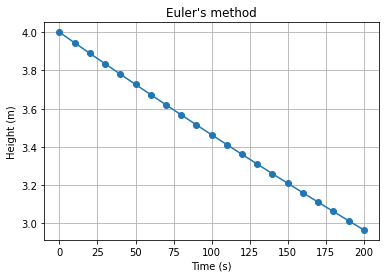

Euler's method


,t[k],u[k],h(t[k]),error
0,0.0,4.000000000,4.000000000,0.000000000
1,10.0,3.944632000,3.944823601,0.000191601
2,20.0,3.889648537,3.890030404,0.000381867
3,30.0,3.835049621,3.835620409,0.000570788
4,40.0,3.780835261,3.781593615,0.000758354
5,50.0,3.727005467,3.727950024,0.000944557
6,60.0,3.673560249,3.674689635,0.001129386
7,70.0,3.620499616,3.621812447,0.001312831
8,80.0,3.567823579,3.569318462,0.001494882
9,90.0,3.515532148,3.517207678,0.001675530


In [16]:
def v(x):
    t1 = 1
    x1 = -0.0027684*math.sqrt(x[1])
    return np.array([t1, x1])

def h(t):
    return (2 - 0.0013842*t)**2

a = 0
b = 200
x0 = [a, 4]
n = 20
u = euler(v, a, b, x0, n)

# add exact h(t) to u = [t, u(t)]
h_points = np.array([h(i) for i in u[:, 0]]).reshape(-1, 1)
u = np.append(u, h_points, axis=1)

# add error to u = [t, u(t), h(t)]
error = np.abs(u[:, 1] - u[:, 2]).reshape(-1, 1)
u = np.append(u, error, axis=1)

# plot
plt.plot(u[:, 0], u[:, 1], marker='o')
plt.ylabel("Height (m)")
plt.xlabel("Time (s)")
plt.title("Euler's method")
plt.grid(True)
plt.show()

# print
print("Euler's method")
pd.set_option("display.precision", 9)
pd.DataFrame(u, range(len(u[:, 0])), ["t[k]", "u[k]", "h(t[k])", "error"])

### Practica Calificada 4, pregunta 1 

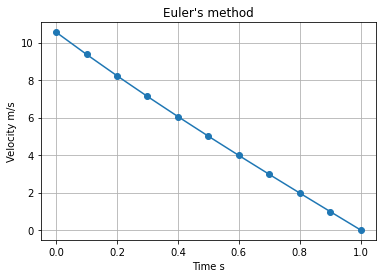

Euler's method


,t,v
0,0.0,10.550000000
1,0.1,9.367631818
2,0.2,8.228081771
3,0.3,7.124988445
4,0.4,6.052687608
5,0.5,5.006078467
6,0.6,3.980513337
7,0.7,2.971705180
8,0.8,1.975648758
9,0.9,0.988552053


In [25]:
def v(x):
    g = 9.8
    k = 0.002
    m = 0.11

    t1 = 1
    x1 = -g - k/m*x[1]**2
    return np.array([t1, x1])
 
a = 0
b = 1
x0 = [a, 10.55] # Empezar e ir bajando hasta obtener un valor aproximado a 0
n = 10
u = euler(v, a, b, x0, n)

# plot
plt.plot(u[:, 0], u[:, 1], marker='o')
plt.ylabel("Velocity m/s")
plt.xlabel("Time s")
plt.title("Euler's method")
plt.grid(True)
plt.show()

# print
print("Euler's method")
pd.set_option("display.precision", 9)
pd.DataFrame(u, range(len(u[:, 0])), ["t", "v"])

### Zapateiro page 245, Example 6.2.1 (Observation: If it matches) 

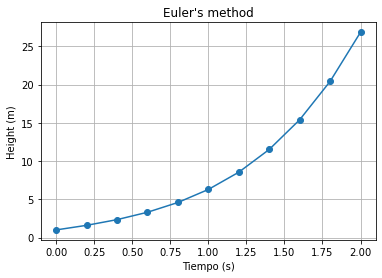

Euler's method


,t[k],u[k],h(t[k]),error
0,0.0,1.00000000000,1.00000000000,0.00000000000
1,0.2,1.60000000000,1.67262482344,0.07262482344
2,0.4,2.34400000000,2.54642227877,0.20242227877
3,0.6,3.30880000000,3.71906920351,0.41026920351
4,0.8,4.58656000000,5.30986835643,0.72330835643
5,1.0,6.28787200000,7.46453645613,1.17666445613
6,1.2,8.54544640000,10.36105230463,1.81560590463
7,1.4,11.51853568000,14.21679970160,2.69826402160
8,1.6,15.39824281600,19.29729181956,3.89904900356
9,1.8,20.41389137920,25.92682717972,5.51293580052


In [30]:
def f1(x):
    dt = 1
    dx = x[1] + 3*x[0]**2 + 2
    return np.array([dt, dx])

def x1(t):
    return -3*t**2 - 6*t - 8 + 9*math.e**t

# Euler's method
a = 0
b = 2
x0 = [a, 1]
n = 10
u = euler(f1, a, b, x0, n)

# add exact h(t) to u = [t, u(t)]
x_points = np.array([x1(i) for i in u[:, 0]]).reshape(-1, 1)
u = np.append(u, x_points, axis=1)

# add error to u = [t, u(t), h(t)]
error = np.abs(u[:, 1] - u[:, 2]).reshape(-1, 1)
u = np.append(u, error, axis=1)

# plot
plt.plot(u[:, 0], u[:, 1], linestyle='-', marker='o')
plt.ylabel("Height (m)")
plt.xlabel("Tiempo (s)")
plt.title("Euler's method")
plt.grid(True)
plt.show()

# print
print("Euler's method")
pd.set_option("display.precision", 11)
pd.DataFrame(u, range(len(u[:, 0])), ["t[k]", "u[k]", "h(t[k])", "error"])

### System of differencial equations
##### Session 15 ODE System, page 10. Example (Observation: If it matches) 

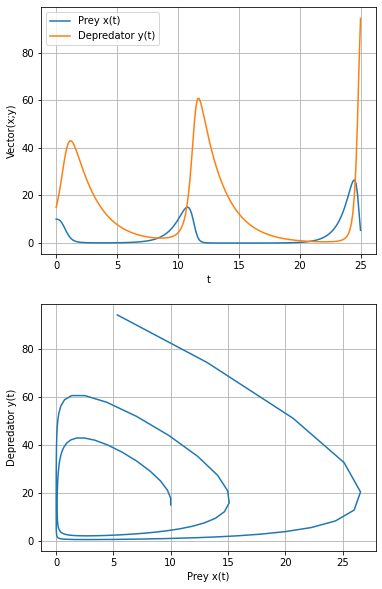

Euler's method for Systems


,t[k],x(t[k]),y(t[k])
0,0.000,10.00000000000,15.00000000000
1,0.125,10.00000000000,17.81250000000
2,0.250,9.71875000000,21.15234375000
3,0.375,9.12081909180,24.96968078613
4,0.500,8.21150254326,29.10267426776
...,...,...,...
196,24.500,26.56965239180,20.41626437755
197,24.625,25.13056977406,32.70157404522
198,24.750,20.68206335752,51.20295537402
199,24.875,13.19454518977,74.47733984159


In [36]:
def F(x):
    """
    x = [t, x(t), y(t)]
    """
    dt = 1
    dx = 1.2*x[1] - 0.08*x[1]*x[2]
    dy = 0.2*x[1]*x[2] - 0.5*x[2]
    return np.array([dt, dx, dy])
    
# Euler for system of differential equations
# x0 = x(t0) = [0, 10, 15]
a = 0
b = 25
n = 200
x0 = np.array([a, 10, 15])
u = euler(F, a, b, x0, n)

# plot
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)

ax1.plot(u[:, 0], u[:, 1])
ax1.plot(u[:, 0], u[:, 2])
ax1.grid(True)
ax1.set_xlabel("t")
ax1.set_ylabel("Vector(x;y)")
ax1.legend(("Prey x(t)", "Depredator y(t)"))

ax2.plot(u[:, 1], u[:, 2])
ax2.grid(True)
ax2.set_xlabel("Prey x(t)")
ax2.set_ylabel("Depredator y(t)")
plt.show()

# print
print("Euler's method for Systems")
pd.set_option("display.precision", 11)
pd.DataFrame(u, range(len(u[:, 0])), ["t[k]", "x(t[k])", "y(t[k])"])

### Rigid Equation
##### implicit
$$
\begin{array}{l}
x_{i+1}=x_{i}+h f_{1}\left(t_{i+1}, x_{i+1}, y_{i+1}\right) \\
y_{i+1}=y_{i}+h f_{2}\left(t_{i+1}, x_{i+1}, y_{i+1}\right)
\end{array}
$$
##### Session 16 rigid equation, page 2

In [38]:

def F(x):
    dt = 1
    dx = 1195*x[1] - 1995*x[2]
    dy = 1197*x[1] - 1997*x[2]
    return np.array([dt, dx, dy])

a = 0
b = 0.1
x0 = [a, 2, -2]
n = 1
h = 0.1
u = euler(F, a, b, x0, n)
# print explicit Euler
print("Explicit Euler")
print(u)

# print implicit Euler
J = np.array([[1 - 1195*h, 1995*h],
              [-1197*h, 1 + 1997*h]])

Jinv = np.linalg.inv(J)
print("Implicit Euler")
print(Jinv@x0[1:])

Explicit Euler
[[  0.    2.   -2. ]
 [  0.1 640.  636.8]]
Implicit Euler
[8.2345679012 4.9012345679]
